### Decision Tree Hands-On

In [1]:
# CART -> classification and Regression Tree

#### Importing Basic libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#EDA--
#data analysis-- shape, info(), describe(), dtypes, corr()
#missing value analysis
#outlier analysis
#visualization--

#supervised model building part-- classification model
#independent and dependent data
#divide the data into train and test set
#create your model
#train your model
#test your model-- predict()
#performance of the model-- accuracy score, confusion matrix, classification_report

#### Import the Dataset

In [4]:
data=pd.read_csv('heart-1.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Checking the number of targets wrt to labels

In [5]:
data.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [6]:
from sklearn.metrics.pairwise import normalize
data.target.value_counts(normalize=True)*100

target
1    54.455446
0    45.544554
Name: proportion, dtype: float64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.shape

(303, 14)

In [9]:
data[data['chol']<300].target.value_counts(normalize=True)

target
1    0.548263
0    0.451737
Name: proportion, dtype: float64

In [10]:
data[data['chol']>300].count()

age         43
sex         43
cp          43
trestbps    43
chol        43
fbs         43
restecg     43
thalach     43
exang       43
oldpeak     43
slope       43
ca          43
thal        43
target      43
dtype: int64

In [11]:
f=data[data['thal']==2]
f.shape

(166, 14)

In [12]:
f['target'].value_counts()

target
1    130
0     36
Name: count, dtype: int64

In [13]:
f[f['target']==1].shape


(130, 14)

In [14]:
data.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

In [15]:
data.shape

(303, 14)

#### Checking the null values

In [16]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Univariate Analysis

#### **Age**

Text(0.5, 1.0, 'Age distribuition')

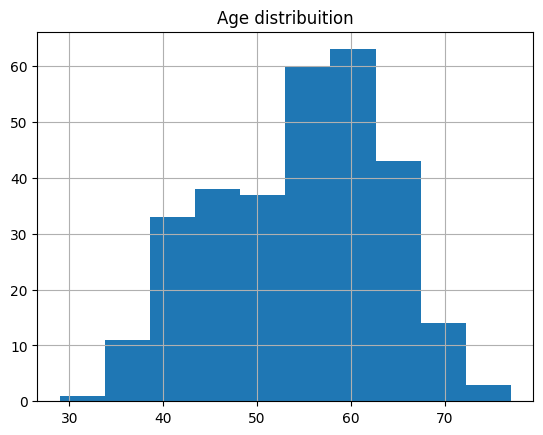

In [18]:
data['age'].hist(grid=True,bins=10);
plt.title('Age distribuition')

In the above graph, we can analyse the distribution of age column, and we can say that there are 
60+ peoplw who are having age between 57 to 63

C:\Users\Admin\AppData\Local\Temp\ipykernel_8660\3262849815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

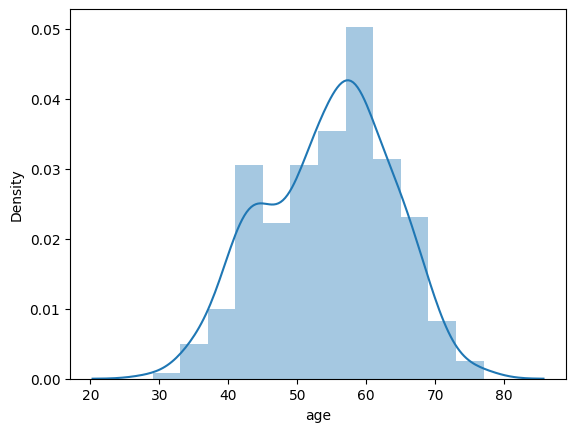

In [19]:
sns.distplot(data['age'])

#### **Sex**

C:\Users\Admin\AppData\Local\Temp\ipykernel_8660\4015075100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['sex']==1]['age'],  label='female')
C:\Users\Admin\AppData\Local\Temp\ipykernel_8660\4015075100.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['sex']==0]['age'

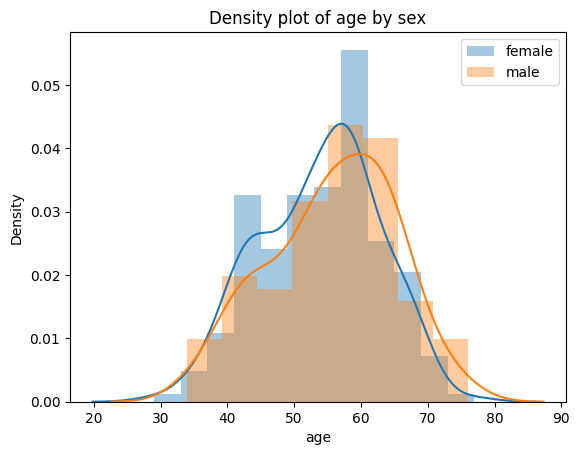

In [20]:
sns.distplot(data[data['sex']==1]['age'],  label='female')
sns.distplot(data[data['sex']==0]['age'], label='male')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

Density graph shows the smoothed distribution of points along the numerical axis. The density peaks where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.

#### **Trestbps**

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

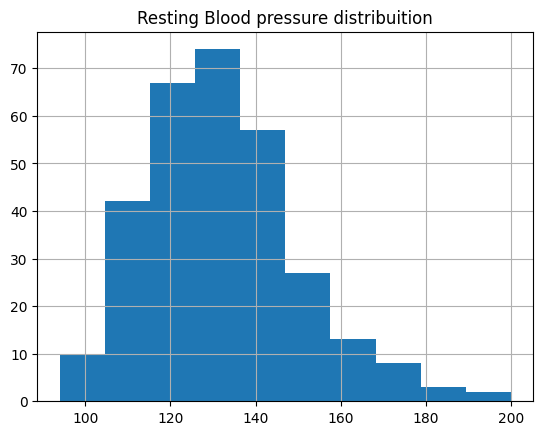

In [21]:
data['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8660\3573761423.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['trestbps'], bins=10)


Text(0.5, 1.0, 'Resting Blood pressure desnity plot')

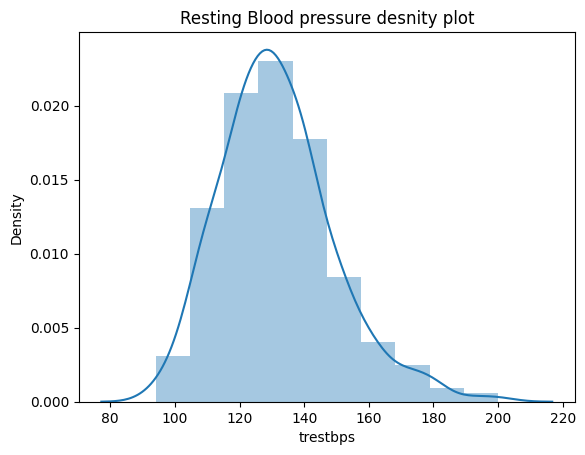

In [22]:
sns.distplot(data['trestbps'], bins=10)
plt.title('Resting Blood pressure desnity plot')

In the above grapgh, we are having a normal distribution 

#### **chol**

Text(0.5, 1.0, 'chol')

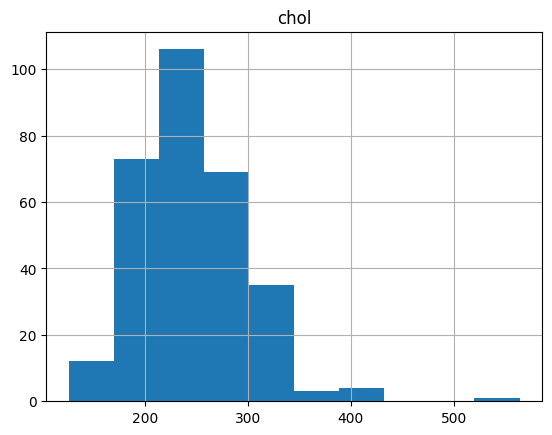

In [23]:
data['chol'].hist()
plt.title('chol')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8660\4005158308.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['chol'],bins=10)


Text(0.5, 1.0, 'chol distribution')

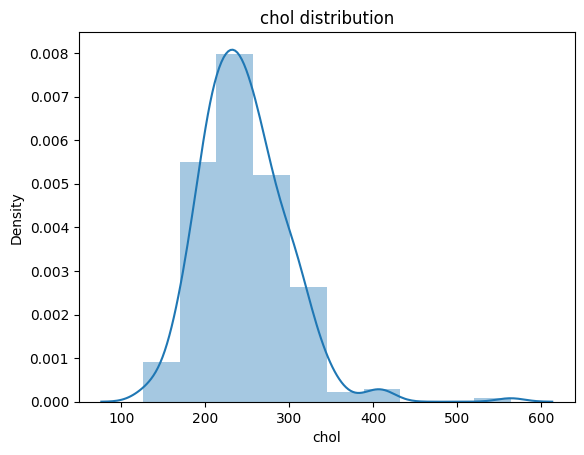

In [24]:
sns.distplot(data['chol'],bins=10)
plt.title('chol distribution')

#### **thalach**

Text(0.5, 1.0, 'thalach')

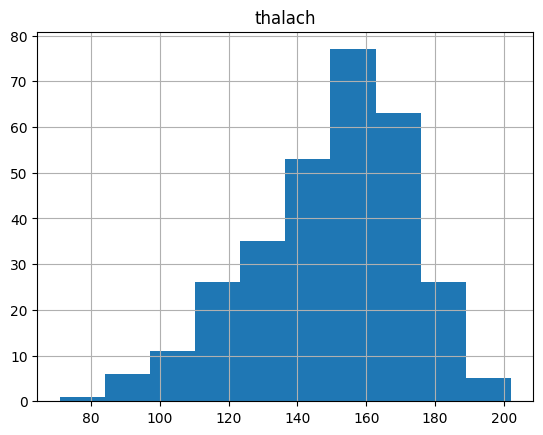

In [25]:
data['thalach'].hist()
plt.title('thalach')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8660\740766034.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['thalach'],bins=10)


Text(0.5, 1.0, 'thalach')

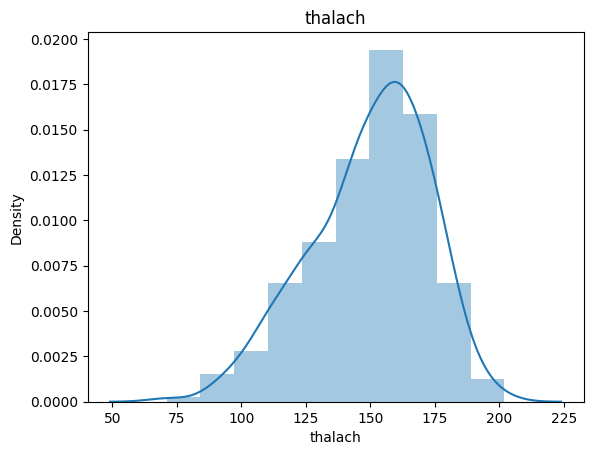

In [26]:
sns.distplot(data['thalach'],bins=10)
plt.title('thalach')

### Correlation

<Axes: >

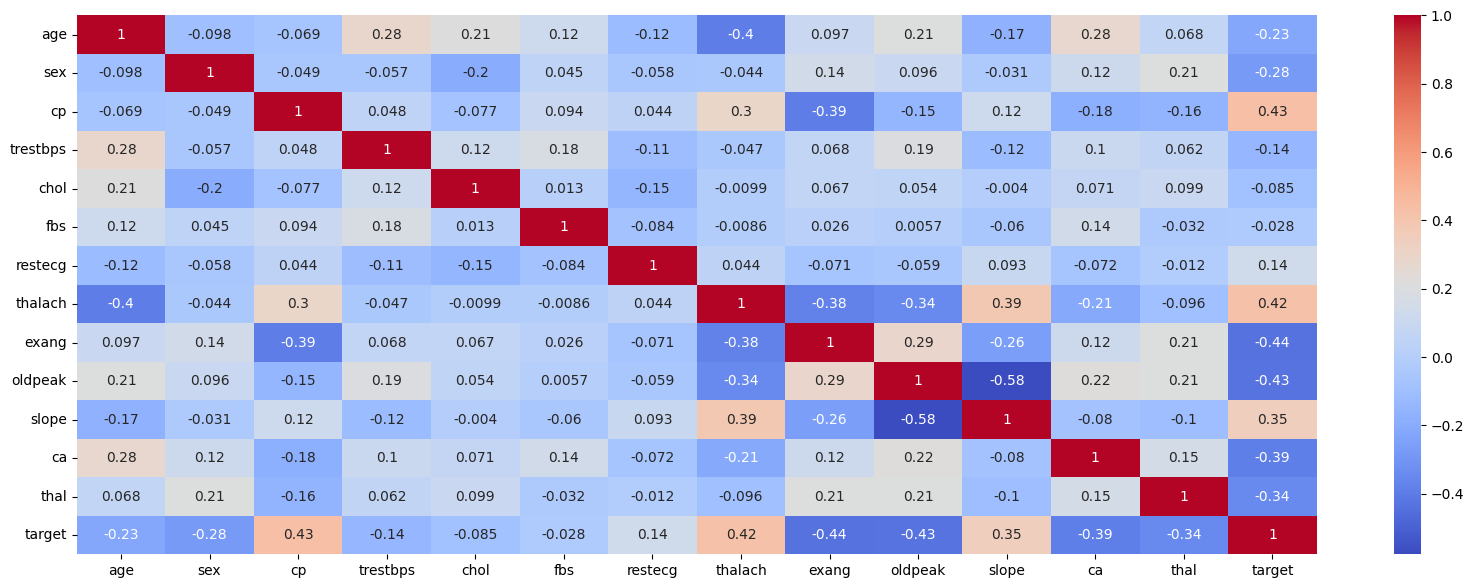

In [27]:
plt.rcParams['figure.figsize']=(20,7)
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

#### Target

Text(0.5, 1.0, 'Count of target Feature by Sex')

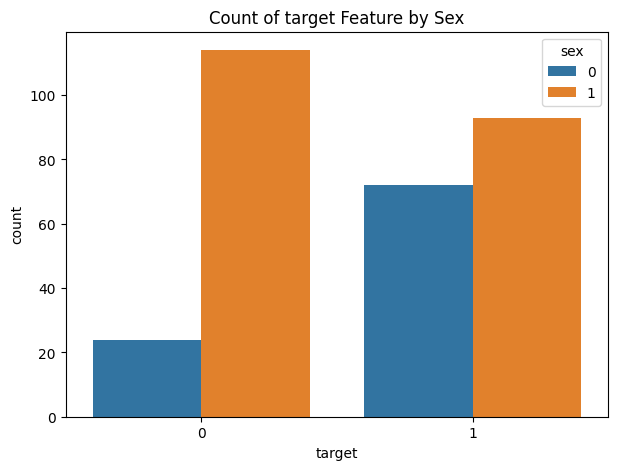

In [28]:
plt.rcParams['figure.figsize']=(7,5)
sns.countplot(x='target',hue='sex',data=data)
plt.title('Count of target Feature by Sex')

The amount of Healthy male People is greater than the amount of unhealthy. For women, the number of unhealthy womwn is higher.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='oldpeak'>

<Figure size 2500x1500 with 0 Axes>

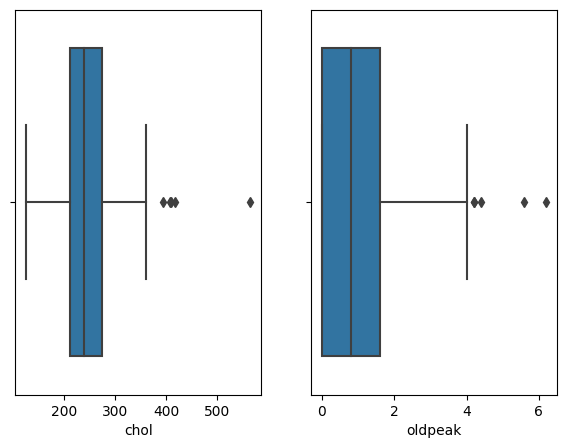

In [29]:
plt.figure(figsize=(25,15))
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data=data, orient='v', ax=axes[0])
sns.boxplot(x='oldpeak', data=data,  orient='v', ax=axes[1])

In [30]:
# Outliers are not that much in these columns
# Q1 = data.quantile(.25)
# Q3 = data.quantile(.75)
# IQR = Q3-Q1

In [31]:
# data >= Q1-1.5*IQR or  data<=Q3+1.5*IQR

In [32]:
# IQR method of Handling Outliers
# Lower Limit -- Q1-1.5*IQR
# Upper Limit -- Q3+1.5*IQR

In [33]:
# Lower Limit -- mean-3*std
# Upper Limit -- mean+3*std

In [34]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

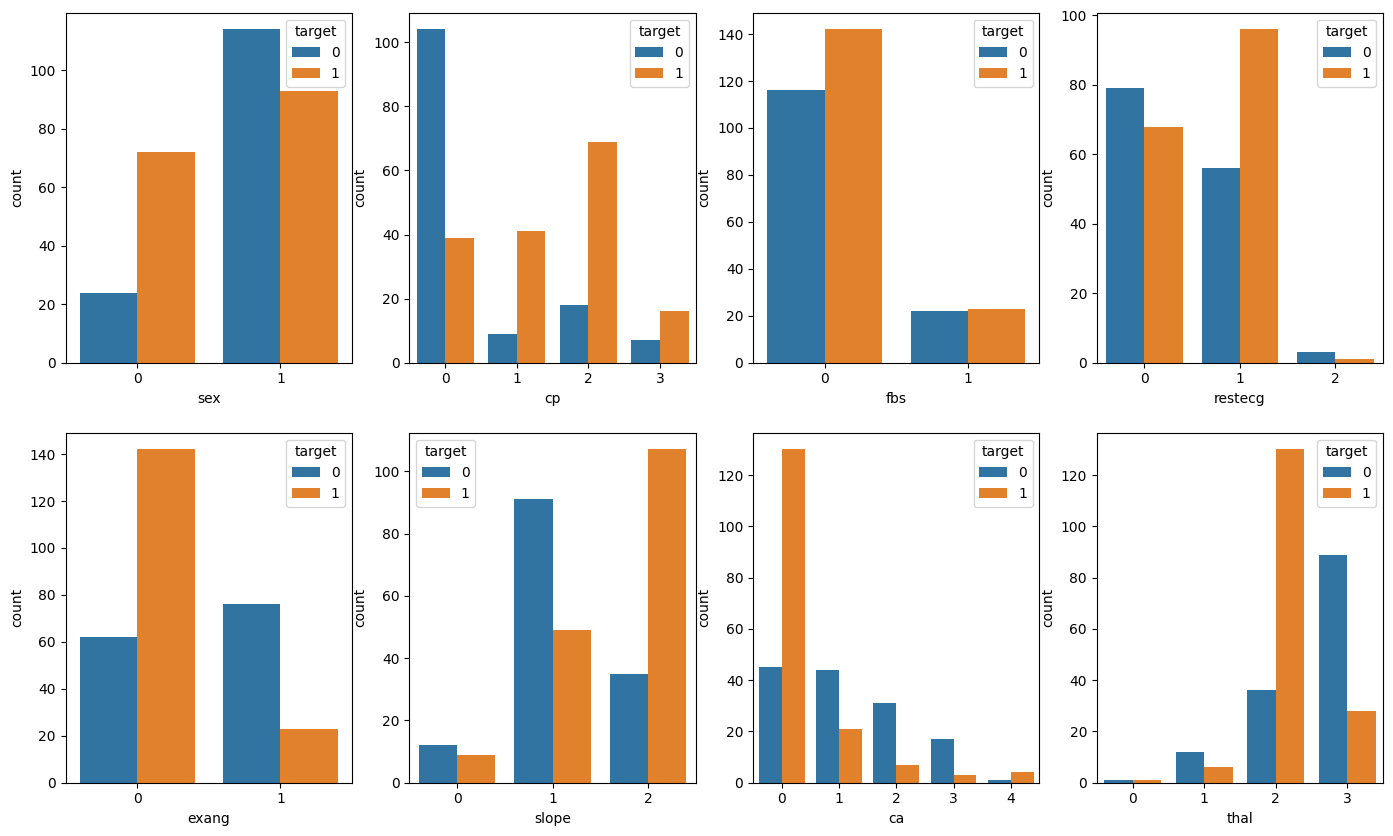

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    if feature != 'target':
        ax = axes[int(idx/4), idx%4]
        sns.countplot(x=feature, hue='target', data=data,ax=ax)

Let's get some insights frm this chart:

Chest pain: the heart desease diagnosis is greater among the patients that feel any chest pain.

Restegc - Eletrocardiagraph results: the rate of heart desease diagnoses higher for patients with a ST-T wabe abnormality .

Slope: The ratio of patients diagnosed with heart desease is higher for slope = 2

Ca: The diagonosed ratio decreases fo ca between 1 and 3.

Thal: the diagnosed ratio is higher for thal = 2.

<Axes: >

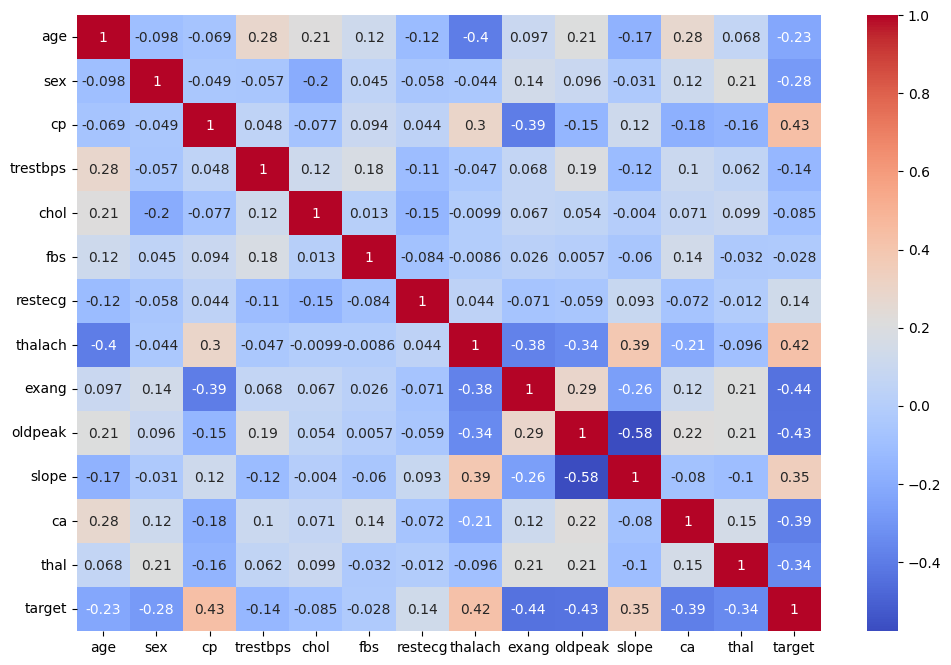

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

Apparently there are no features with a pretty strong correlation (above |0.7|)

Text(0.5, 1.0, ' Cholesterol vs Blood pressure in rest')

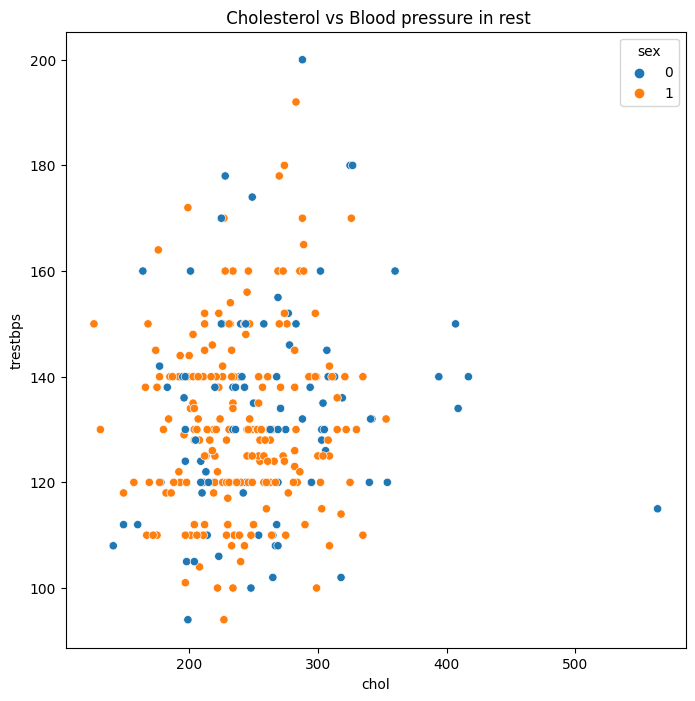

In [37]:
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='chol', y='trestbps', hue='sex', size=None, data=data)
plt.title(' Cholesterol vs Blood pressure in rest')

As can be seen there is a paitient with high cholesterol. But, there's not a specific division between those that feel pain during exercise practice and those of not feel pain. We can use hue to filter by sex. It's also possible to filter using size = 'label_to_filer'.

#### Train Test Split

In [38]:
X = data.drop(columns=['target'])           #independent variable
y = data['target']                          #dependnet or target value
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=45, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


#### Model Building

In [40]:
# DecisionTreeClassifier -- work with classification Problem
# DecisionTreeRegressor -- work with regression problem

In [41]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [68]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)


DecisionTreeClassifier()

In [43]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [44]:
y_train_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [45]:
y_test_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0], dtype=int64)

In [46]:
a=90
print('The value of a is', a)

The value of a is 90


In [47]:
print(f'The value of a is {a}')

The value of a is 90


#### Performance Metrics

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
print(f'Train score {accuracy_score(y_train,y_train_pred)}')
print(f'Test score {accuracy_score(y_test,y_test_pred)}')

Train score 1.0
Test score 0.8241758241758241


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        37
           1       0.87      0.83      0.85        54

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_test,y_test_pred)

array([[30,  7],
       [ 9, 45]], dtype=int64)

#### Plot the Tree

[Text(0.5931291390728477, 0.95, 'cp <= 0.5\ngini = 0.499\nsamples = 212\nvalue = [101, 111]\nclass = a'),
 Text(0.32450331125827814, 0.85, 'ca <= 0.5\ngini = 0.387\nsamples = 103\nvalue = [76, 27]\nclass = t'),
 Text(0.1986754966887417, 0.75, 'thal <= 2.5\ngini = 0.5\nsamples = 47\nvalue = [23, 24]\nclass = a'),
 Text(0.10596026490066225, 0.65, 'exang <= 0.5\ngini = 0.4\nsamples = 29\nvalue = [8, 21]\nclass = a'),
 Text(0.052980132450331126, 0.55, 'thalach <= 96.5\ngini = 0.198\nsamples = 18\nvalue = [2, 16]\nclass = a'),
 Text(0.026490066225165563, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = t'),
 Text(0.07947019867549669, 0.45, 'chol <= 316.0\ngini = 0.111\nsamples = 17\nvalue = [1, 16]\nclass = a'),
 Text(0.052980132450331126, 0.35, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = a'),
 Text(0.10596026490066225, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = t'),
 Text(0.15894039735099338, 0.55, 'thalach <= 146.0\ngini = 0.496\nsamples = 11\nvalue = [6, 5]\nc

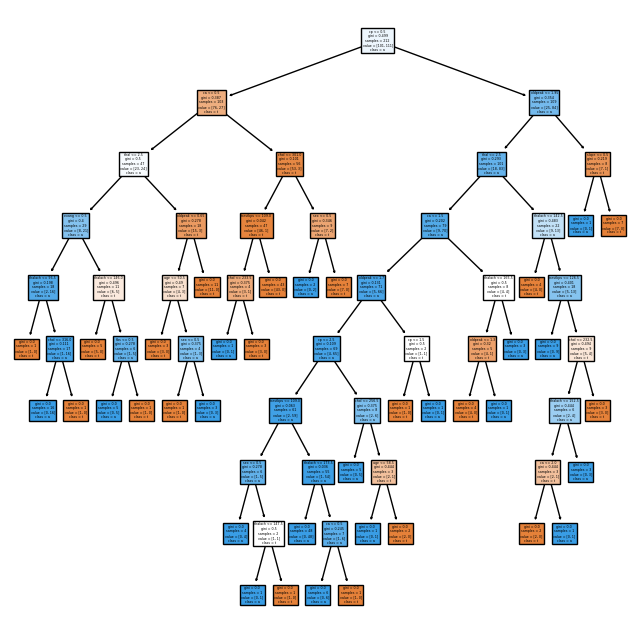

In [53]:
tree.plot_tree(clf,feature_names=X.columns,class_names='target',filled=True)

In [54]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,cmap='Blues', fmt='g')#For g and G , the maximum number of significant digits
    plt.tight_layout()
    plt.show()

Train Confusion matrix


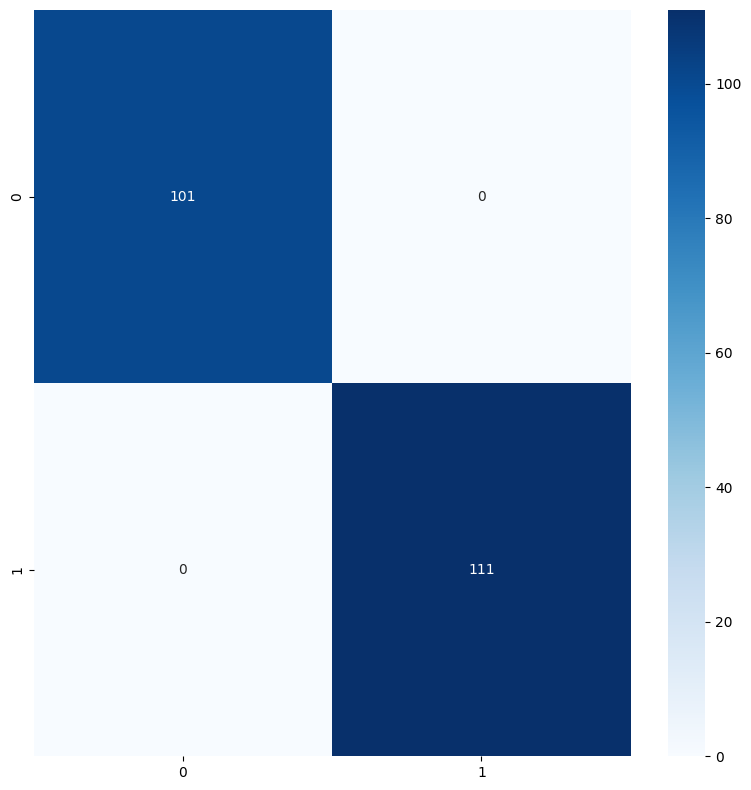

Test Confusion matrix


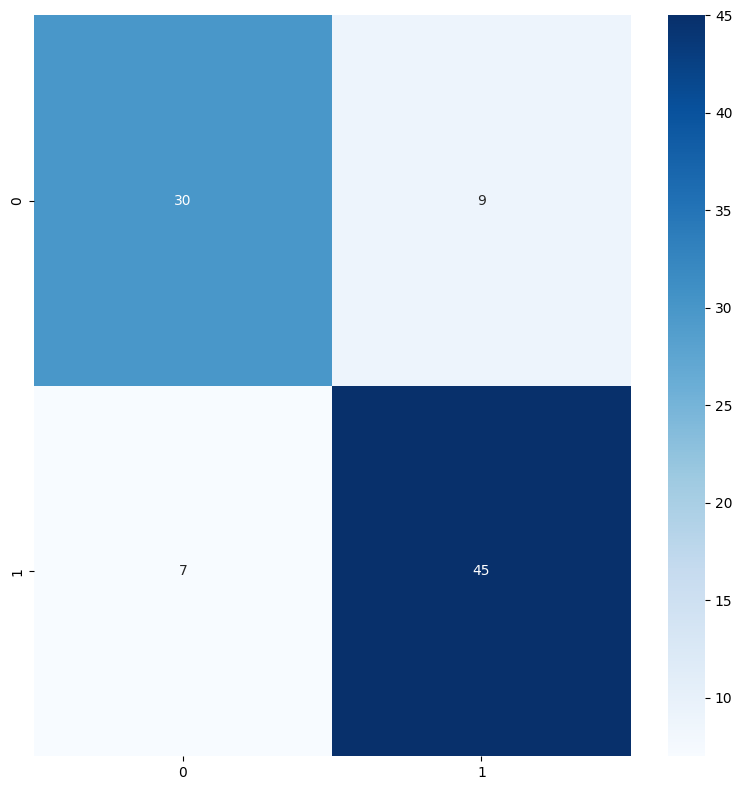

In [55]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [56]:
#               Actual Values
#predicted       1   0
#             1  TP  FP
#             0  FN  TN 

In [76]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])

for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter,splitter='best')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    df.loc[len(df)] = [input_parameter, acc_score] 

print(df)
print("")


    max_depth   accuracy
0         1.0  76.923077
1         2.0  76.923077
2         3.0  82.417582
3         4.0  76.923077
4         5.0  79.120879
5         6.0  78.021978
6         7.0  78.021978
7         8.0  78.021978
8         9.0  78.021978
9        10.0  74.725275
10       11.0  78.021978
11       12.0  80.219780
12       13.0  76.923077
13       14.0  75.824176
14       15.0  78.021978



In [77]:
clf = tree.DecisionTreeClassifier(max_depth=3, splitter='best')
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [78]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.8490566037735849
Test score 0.8241758241758241


In [ ]:
# for input_para in c_parameter_values:
#     model = tree.DecisionTreeClassifier(max_depth=input_para, splitter='best')
#     model.fit(x_train, y_train)
#     y_pred1 = model.predict(x_test)
#     acc_score = accuracy_score(y_test, y_pred)*100
#     df = df.append({c_parameter_name: input_para, 'accuracy':acc_score}, ignore_index=True)

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        39
           1       0.83      0.87      0.85        52

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [ ]:
#recall->tp / (tp + fn)
#The recall is the measure of our model correctly identifying True Positives. 
#Thus, for all the customers who actually have heart disease, recall tells us how many we correctly identified as a heart patient.

#precision of class 0 = TP of class 0/total number of object 
#What is the Precision for our model? Yes, it is 0.843 or, when it predicts that a patient has heart disease, it is correct around 84% of the time.
#precision of class 1 = TP of class 1/total number of object 

#macro average = (precision of class 0 + precision of class 1)/2 

#weighted average is precision of all classes merge together
#weighted average = (TP of class 0 + TP of class 1)/(total number of class 0 + total number of class 1) 

#F1-score is a measure of a model's accuracy on a dataset
#a good F1 score means that you have low false positives and low false negatives, 
#Accuracy is used when the True Positives and True negatives are more important while 
#F1-score is used when the False Negatives and False Positives are crucial.
#Support is the number of actual occurrences of the class in the specified dataset.